# Домашнее задание к лекции "Статистика. Практика"

## Задание 1

Вернемся к [набору данных о видеоиграх](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/vgsales.csv).

Ответьте на следующие вопросы:

1) Как критики относятся к спортивным играм?  
2) Критикам нравятся больше игры на PC или на PS4?  
3) Критикам больше нравятся стрелялки или стратегии?  

Для каждого вопроса:
- сформулируйте нулевую и альтернативную гипотезы;
- выберите пороговый уровень статистической значимости;
- опишите полученные результаты статистического теста.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import nltk
import sklearn

In [2]:
df = pd.read_csv('vgsales.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


### 1) Как критики относятся к спортивным играм?

In [3]:
print(f'Средний уровень оценки критиков составляет {df.Critic_Score.mean()}',
      f'Средний уровень оценки критиков для жанра "Sports" составляет {df[df["Genre"]=="Sports"].Critic_Score.mean()}', sep='\n')

Средний уровень оценки критиков составляет 68.96767850559173
Средний уровень оценки критиков для жанра "Sports" составляет 71.96817420435511


* H0: Уровень оценки критиков в жанре Sports не отличается от остальной части выборки.
* H1: Уровень оценки критиков в жанре Sports выше остальной части выборки.

<AxesSubplot:>

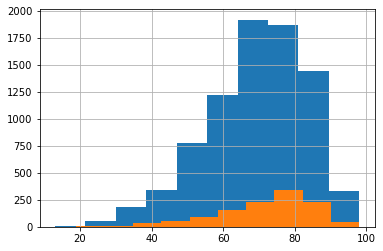

In [4]:
df.Critic_Score.hist()
df[df["Genre"]=="Sports"].Critic_Score.hist()

Распределение не совсем нормальное, но, т.к. отсутствуют сильные выбросы, используем тест Стьюдента.

In [5]:
t, p = stats.ttest_ind(df[df["Genre"]=="Sports"].Critic_Score.dropna(), df.Critic_Score.dropna()) # Удаляем пропуски для корректной работы теста
print('Статистика=%.3f, p=%.3f' % (t, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, различий, вероятно, нет')
else:
    print('Отклоняем нулевую гипотезу, вероятно, различия есть')

Статистика=6.950, p=0.000
Отклоняем нулевую гипотезу, вероятно, различия есть


In [6]:
# генерируем как можно больше разниц оценок критиков в жанре "Sports" и вне зависимости от жанра, случайно их выбирая
np.random.seed(0) # Фиксация случайности
d_dif = []
for i in range(5000):
    sport = df.query('Genre == "Sports"').sample(frac=1, replace=True).Critic_Score.mean()
    all_ = df.sample(frac=1, replace=True).Critic_Score.mean()
    d_dif.append(sport - all_)
# определяем 95% доверительный интервал
confidence_interval = pd.Series(d_dif).quantile([0.025, 0.975])
confidence_interval

0.025    2.130067
0.975    3.833451
dtype: float64

***С вероятностью 95% оценки критиков в жанре "Sports" выше на 2.13-3.83 баллов.***

### 2) Критикам нравятся больше игры на PC или на PS4?

In [7]:
print(f'Средний уровень оценки критиков игр на PC составляет {df[df["Platform"]=="PC"].Critic_Score.mean()}',
      f'Средний уровень оценки критиков игр на PS4 составляет {df[df["Platform"]=="PS4"].Critic_Score.mean()}', sep='\n')

Средний уровень оценки критиков игр на PC составляет 75.92867132867133
Средний уровень оценки критиков игр на PS4 составляет 72.09126984126983


* H0: Уровень оценки критиков игр на PC не отличается от игр на PS4.
* H1: Уровень оценки критиков игр на PC выше, чем у игр на PS4.

<AxesSubplot:>

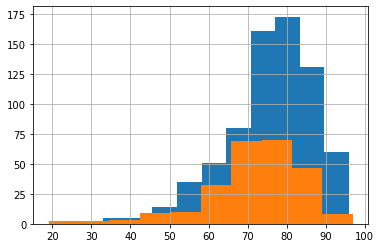

In [8]:
df[df['Platform']=='PC'].Critic_Score.hist()
df[df['Platform']=='PS4'].Critic_Score.hist()

Распределение не совсем нормальное, но, т.к. отсутствуют сильные выбросы, используем тест Стьюдента.

In [9]:
t, p = stats.ttest_ind(df[df['Platform']=='PC'].Critic_Score.dropna(), df[df['Platform']=='PS4'].Critic_Score.dropna()) # Удаляем пропуски для корректной работы теста
print('Статистика=%.3f, p=%.3f' % (t, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, различий, вероятно, нет')
else:
    print('Отклоняем нулевую гипотезу, вероятно, различия есть')

Статистика=4.544, p=0.000
Отклоняем нулевую гипотезу, вероятно, различия есть


In [10]:
# генерируем как можно больше разниц оценок критиков игр на PC и игр на PS4, случайно их выбирая
np.random.seed(0) # Фиксация случайности
d_dif = []
for i in range(5000):
    pc = df.query('Platform == "PC"').sample(frac=1, replace=True).Critic_Score.mean()
    ps4 = df.query('Platform == "PS4"').sample(frac=1, replace=True).Critic_Score.mean()
    d_dif.append(pc - ps4)
# определяем 95% доверительный интервал
confidence_interval = pd.Series(d_dif).quantile([0.025, 0.975])
confidence_interval

0.025    2.089903
0.975    5.589382
dtype: float64

***С вероятностью 95% оценки критиков игр на PC выше, чем на PS4, на 2.08-5.59 баллов.***

### 3) Критикам больше нравятся стрелялки или стратегии?

In [11]:
print(f'Средний уровень оценки критиков для жанра "Shooter" составляет {df[df["Genre"]=="Shooter"].Critic_Score.mean()}',
      f'Средний уровень оценки критиков для жанра "Strategy" составляет {df[df["Genre"]=="Strategy"].Critic_Score.mean()}', sep='\n')

Средний уровень оценки критиков для жанра "Shooter" составляет 70.18114406779661
Средний уровень оценки критиков для жанра "Strategy" составляет 72.08609271523179


* H0: Уровень оценки критиков игр жанра "Strategy" не отличается от игр жанра "Shooter".
* H1: Уровень оценки критиков игр "Strategy" выше, чем у игр "Shooter".

<AxesSubplot:>

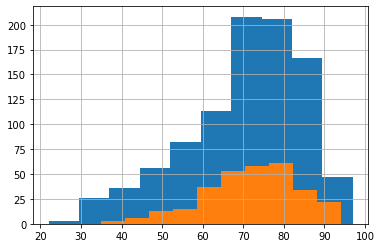

In [12]:
df[df["Genre"]=="Shooter"].Critic_Score.hist()
df[df["Genre"]=="Strategy"].Critic_Score.hist()

Распределение не совсем нормальное, но, т.к. отсутствуют сильные выбросы, используем тест Стьюдента.

In [13]:
t, p = stats.ttest_ind(df[df["Genre"]=="Strategy"].Critic_Score.dropna(), df[df["Genre"]=="Shooter"].Critic_Score.dropna()) # Удаляем пропуски для корректной работы теста
print('Статистика=%.3f, p=%.3f' % (t, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, различий, вероятно, нет')
else:
    print('Отклоняем нулевую гипотезу, вероятно, различия есть')

Статистика=2.067, p=0.039
Отклоняем нулевую гипотезу, вероятно, различия есть


In [14]:
# генерируем как можно больше разниц оценок критиков в жанре "Sports" и вне зависимости от жанра, случайно их выбирая
np.random.seed(0) # Фиксация случайности
d_dif = []
for i in range(5000):
    strategy = df.query('Genre == "Strategy"').sample(frac=1, replace=True).Critic_Score.mean()
    shooter = df.query('Genre == "Shooter"').sample(frac=1, replace=True).Critic_Score.mean()
    d_dif.append(strategy - shooter)
# определяем 95% доверительный интервал
confidence_interval = pd.Series(d_dif).quantile([0.025, 0.975])
confidence_interval

0.025    0.312381
0.975    3.542438
dtype: float64

***С вероятностью 95% оценки критиков в жанре "Strategy" выше, чем игр в жанре "Shooter" на 0.31-3.54 баллов.***

## Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные [здесь](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/spam.csv)) по признаку спама. Для этого:

1) Привидите весь текст к нижнему регистру;  
2) Удалите мусорные символы;  
3) Удалите стоп-слова;  
4) Привидите все слова к нормальной форме;  
5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:  

```
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
```

Можете поэкспериментировать с параметрами [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html);  
6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите `random_state=42`. Используйте [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html);  
7) Постройте модель [логистической регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), укажите `random_state=42`, оцените ее точность на тестовых данных;  
8) Опишите результаты при помощи [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix);  
9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

1) Привидите весь текст к нижнему регистру

In [15]:
data = pd.read_csv('spam.csv')
for col in data:
    data[col] = data[col].str.lower()
data.head()

,Category,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


2) Удалите мусорные символы

In [16]:
data = data.replace(r'[\W_]+', ' ', regex=True)
data.head()

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives arou...


3) Удалите стоп-слова

In [17]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))

pat = r'\b(?:{})\b'.format('|'.join(stop))
data['Message'] = data['Message'].str.replace(pat, '')
data['Message'] = data['Message'].str.replace(r'\s+', ' ')
data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fight\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\fight\AppData\Local\Temp\ipykernel_6420\2351194735.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Message'] = data['Message'].str.replace(pat, '')
C:\Users\fight\AppData\Local\Temp\ipykernel_6420\2351194735.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Message'] = data['Message'].str.replace(r'\s+', ' ')


,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah think goes usf lives around though


4) Привидите все слова к нормальной форме

In [18]:
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download('wordnet')

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

data['Message'] = data.Message.apply(lemmatize_text)
data.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\fight\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fight\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Category,Message
0,ham,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"[nah, think, go, usf, life, around, though]"


In [19]:
data['Message'] = data.Message.apply(' '.join)
data.head()

,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf life around though


5) Преобразуйте все сообщения в вектора TF-IDF

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
tfidf_matrix

C:\Users\fight\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите random_state=42. Используйте train_test_split

In [21]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(tfidf_matrix, data.Category, test_size=0.3, train_size=0.7, random_state=42, shuffle=True)

7) Постройте модель логистической регрессии, укажите random_state=42, оцените ее точность на тестовых данных

In [22]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42).fit(X_train, y_train)

In [23]:
y_pred = clf.predict(X_test)
pred = pd.DataFrame(y_pred, columns=['pred'])
pred['y_test'] = y_test.values
pred

,pred,y_test
0,ham,ham
1,ham,ham
2,ham,ham
3,ham,ham
4,ham,ham
...,...,...
1667,ham,ham
1668,spam,spam
1669,ham,ham
1670,spam,spam


In [26]:
clf.score(X_test, y_test)

0.958732057416268

8) Опишите результаты при помощи confusion_matrix

In [25]:
sklearn.metrics.confusion_matrix(pred['y_test'], pred['pred'])

array([[1445,    3],
       [  66,  158]], dtype=int64)

9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [55]:
errors = pd.DataFrame(y_test).merge(data.Message, how='inner', left_index=True, right_index=True).merge(tfidf_matrix, how='inner', left_index=True, right_index=True)
errors['predict_category'] = clf.predict(errors.drop(['Category', 'Message'], axis=1))
                                         
errors[['Category', 'Message', 'predict_category']].loc[errors['Category'] != errors['predict_category']]

,Category,Message,predict_category
2952,ham,hey free call,spam
881,spam,reminder downloaded content already paid goto ...,ham
1961,spam,guess somebody know secretly fancy wanna find ...,ham
3864,spam,oh god found number glad text back xafter msg ...,ham
2575,spam,next amazing xxx picsfree1 video sent enjoy on...,ham
...,...,...,...
4543,spam,freemsg hi baby wow got new cam moby wanna c h...,ham
752,spam,important customer service announcement premier,ham
309,spam,themob check newest selection content game ton...,ham
495,ham,free call,spam
